# Linear Regression

Solutions to Andrew Ng Machine Learning course using Python Jupyter Notebook by Alek Zdziarski

## Part 1: Basic Function 

In [1]:
# import key libraries (remember to pip install numpy etc. first)
import numpy as np
import sys
import sklearn as sk

In [2]:
# warmup exercise
def warm_up_exercise():
    return np.eye(5)

warm_up_exercise()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

## Part 2: Plotting 

In [3]:
#PATH="/Users/alek/OneDrive/Projects/Courses/Machine Learning Andrew Ng, Stanford, Coursera/ex1 Linear Regression/ex1/"
PATH='./data/'
FILE="ex1data1.txt"
from numpy import genfromtxt
data = genfromtxt(f'{PATH}{FILE}', delimiter=',')
data.shape

(97, 2)

In [4]:
data[:5]

array([[  6.1101,  17.592 ],
       [  5.5277,   9.1302],
       [  8.5186,  13.662 ],
       [  7.0032,  11.854 ],
       [  5.8598,   6.8233]])

In [5]:
X=data[:,0]
y=data[:,1]

X.shape, X.min(), X.max(), y.shape, y.min(), y.max()

((97,),
 5.0269000000000004,
 22.202999999999999,
 (97,),
 -2.6806999999999999,
 24.146999999999998)

In [6]:
m=y.size
#resize X and y into vectors with a shape rather than a row vector. note above 
#that array has no column dimension
X=X.reshape((m,1))
y=y.reshape((m,1))

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

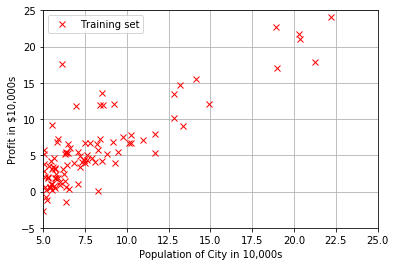

In [8]:
def plot_data(X, y):
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.axis([ 5, 25, -5, 25 ])
    plt.grid(which='both')
    plt.plot(X,y,'rx', label='Training set')
    plt.legend()
    plt.show()

plot_data(X, y)


## Part 3: Cost and Gradient descent

In [9]:
ones=np.ones((m,1))
X = np.concatenate((ones, X), axis=1)

In [10]:
theta = np.zeros((2,1)) # initialize fiting parameters

In [11]:
# Some gradient descent settings
iterations = 1500
alpha = 0.01

In [12]:
# compute cost function
def compute_cost(X, y, theta):
    m = y.size
    return np.sum(((X @ theta - y)**2)/(2*m))

In [13]:
J = compute_cost(X, y, theta)

In [14]:
print(f'With theta = [0 ; 0]\nCost computed = {J}')
print('Expected cost value (approx) 32.07')

With theta = [0 ; 0]
Cost computed = 32.072733877455676
Expected cost value (approx) 32.07


In [15]:
newtheta = np.array(([-1],[2]))
J = compute_cost(X, y, newtheta)
print(f'\nWith theta = [-1 ; 2]\nCost computed = {J}')
print(f'Expected cost value (approx) 54.24\n')



With theta = [-1 ; 2]
Cost computed = 54.24245508201237
Expected cost value (approx) 54.24



In [16]:
# gradient descent
def gradient_descent(X,y,theta,alpha,num_iters):
#function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
#%GRADIENTDESCENT Performs gradient descent to learn theta
#%   theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by
#%   taking num_iters gradient steps with learning rate alpha
#% Initialize some useful values
    m = y.size # number of training examples
    J_history = np.zeros((num_iters, 1))
    for iter in range(num_iters):
        theta = theta - (alpha / m) * (X.T @ (X @ theta -y))
        #print (f'theta: {theta}')
        # Save the cost J in every iteration
        J_history[iter] = compute_cost(X, y, theta);
    return [theta, J_history]

In [17]:
[theta, J_history] = gradient_descent(X, y, theta, alpha, iterations)

In [18]:
print('Theta found by gradient descent:');
print(f'{theta}\n');
print('Expected theta values (approx)');
print(' -3.6303\n  1.1664\n');

Theta found by gradient descent:
[[-3.63029144]
 [ 1.16636235]]

Expected theta values (approx)
 -3.6303
  1.1664



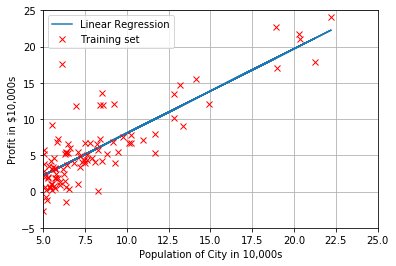

In [19]:
plt.plot(X[:,1], X@theta, '-', label ='Linear Regression')
plot_data(X[:,1],y)

In [20]:
#Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]) @ theta
print(f'For population = 35,000, we predict a profit of {predict1[0]*10000:.2f}')
predict2 = [1, 7] @ theta
print(f'For population = 70,000, we predict a profit of {predict2[0]*10000:.2f}')

For population = 35,000, we predict a profit of 4519.77
For population = 70,000, we predict a profit of 45342.45


## Part 4: Visualizing J(theta_0, theta_1)

In [21]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

theta0_vals.size, theta1_vals.size
# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

# Fill out J_vals
for i in range(theta0_vals.size):
    for j in range(theta1_vals.size):
        t = np.array([[theta0_vals[i]],[theta1_vals[j]]])
        J_vals[i,j] = compute_cost(X, y, t)
J_vals = J_vals.T

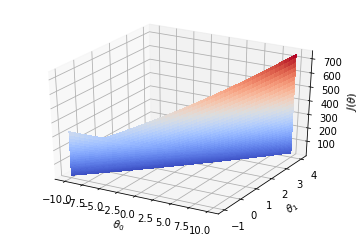

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(theta0_vals, theta1_vals, J_vals,cmap=cm.coolwarm, linewidth=0, antialiased=False)

plt.xlabel(r'$\theta_0$') # interesting that you can use this 2d version
ax.set_ylabel(r'$\theta_1$') # 3d version preferred
ax.set_zlabel(r'$J(\theta)$')
#plt.zlabel('J(\theta)')

plt.show()

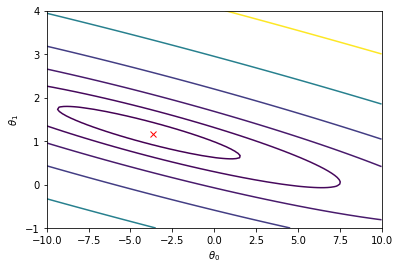

In [23]:
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 15))
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.plot(theta[0][0], theta[1][0], 'rx')